# Introduction

This Notebook walks us through some examples of how the Normalization is removed in order to produce the correctly normalized Response function.

Our desired integrals are of the form, $I(f)$ where

$I(f) = \int \limits_{\omega_0}^{\infty} d\omega \ f(\omega) R_{\hat{O}}(\omega) = \sum\limits_{k \neq 0} f(\omega_k) |\langle f_k |\hat{O}|0 \rangle|^2$.

Here, $R_{\hat{O}}(\omega)$, is the Response function that we would like to extract. Now, in a finite $L2$ basis such as the harmonic oscillator the final states are normalized according the IR limits of the basis. We will denote the $L2$ normalized final states as $| \ f_k \rangle$ and $| \ \tilde{f}_k \rangle$ as the states with the correct asymptotic normalization. The relation between these two states will be given as

$| \ f_k \rangle = \sqrt{w_k} | \ \tilde{f}_k \rangle$  

Since  $\langle \ f_k | \ f_k \rangle = 1$, then  we have that  

$w_k = \frac{1}{\langle \ \tilde{f}_k | \ \tilde{f}_k \rangle}$.


Using these relations, we can now express $I(f)$ as


$I(f) = \int \limits_{\omega_0}^{\infty} d\omega \ f(\omega) R_{\hat{O}}(\omega) = \sum\limits_{k \neq 0} w_k \cdot  f(\omega_k)\cdot |\langle \tilde{f}_k |\hat{O}|0 \rangle|^2$


In order to retrieve the Response function $R(\omega)$ at the points $\omega_k$ we need to remove the quadrature weight factor $w_k$. In general, this factor can be computed according to the expression

$\frac{dE}{d \eta}|_{\eta \rightarrow k} = w_k$


## Procedure

To use the above method, we perform the following steps (Works for any quadrature rule):

1. Read in the Elements $\lbrace k,x_k, f(x_k) \rbrace$  
Note: $k$ is just the index that labels the point (k=1,2,..)  
2. Spline the points $\lbrace k,x_k \rbrace$, so that we have a continuous function $x(\eta)$, where $x(k)=x_k$.
3. Then compute the weight factors $\ w_k = \lim\limits_{\eta \rightarrow k}\frac{dx}{d\eta}(\eta)$
4. Then calculate the corrected function  $ \ \tilde{f}(x_k) = \frac{f(x_k)}{w_k}$


### Note
In general, the relation for a general quadrature rule 

$\int \limits_{a}^{b} dx \  \rho(x) \ f(x) = \sum_i f(x_i)w_i $,

The derivative of the grid points $x_i$ with respect to $\eta$ as described above will be

$ \lim\limits_{\eta \rightarrow k}\frac{dx}{d\eta}(\eta) = \frac{w_k}{\rho(x_k)}$, however in our cases, $\rho(x)=1$.

Also, the larger the number of grid points, the better of an approximation this becomes.



In [ ]:
# Example using Gauss-Legendre Quadrature [-1,1]

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import r2_score
from numpy.polynomial import legendre,chebyshev,laguerre

%matplotlib inline

Nquad =200
Rule = 'leg'

if(Rule=='cheb'):
    x,w = chebyshev.chebgauss(Nquad)
elif(Rule=='lag'):
    x,w = laguerre.laggauss(Nquad)
elif(Rule=='leg'):
    x,w = legendre.leggauss(Nquad)

def weight_func(x,Rule):
    
    if(Rule=='cheb'):
        s = 1.0/np.sqrt(1.0-x**2)
    elif(Rule=='lag'):
        s = np.exp(-x)
    elif(Rule=='leg'):
        s = 1.0
    
    return s


indx = np.asarray(range(0,Nquad))*1.0

# Now we spline the points (indx,x)
x_eta = interp1d(indx, x,kind='linear')

eta_grid = np.arange(0,Nquad-1,0.05)

plt.ylabel('x($\eta$)',size=20)
plt.xlabel('indx',size=20)
plt.plot(indx,x,'o',label='$x_i$')
plt.plot(eta_grid,x_eta(eta_grid),'-',label='x($\eta$)')
plt.legend( fontsize = 'x-large')
plt.plot()


print(np.sum(w))

In [ ]:
# Example continued

# Now we compute w, using the method we mentioned above
def derivative(f,x):
    eps = 1.0e-10
    
    d = f(x+eps)-f(x)
    d = abs(d/eps)
    
    return d

wk =np.asarray([derivative(x_eta,k)*weight_func(x_eta(k),Rule) for k in range(0,Nquad-1)])


#print(w,wk)
plt.clf()
plt.ylabel('w($\eta$)',size=20)
plt.xlabel('k',size=20)
plt.plot(wk,'o',label='w$_k(\eta)$')
plt.plot(w,'o',label='w$_k$')
plt.legend( fontsize = 'x-large')
plt.plot()

print('R2-Score: ',r2_score(w[0:-1],wk))

## Example with Deuteron Response Functions

(0.0, 30)

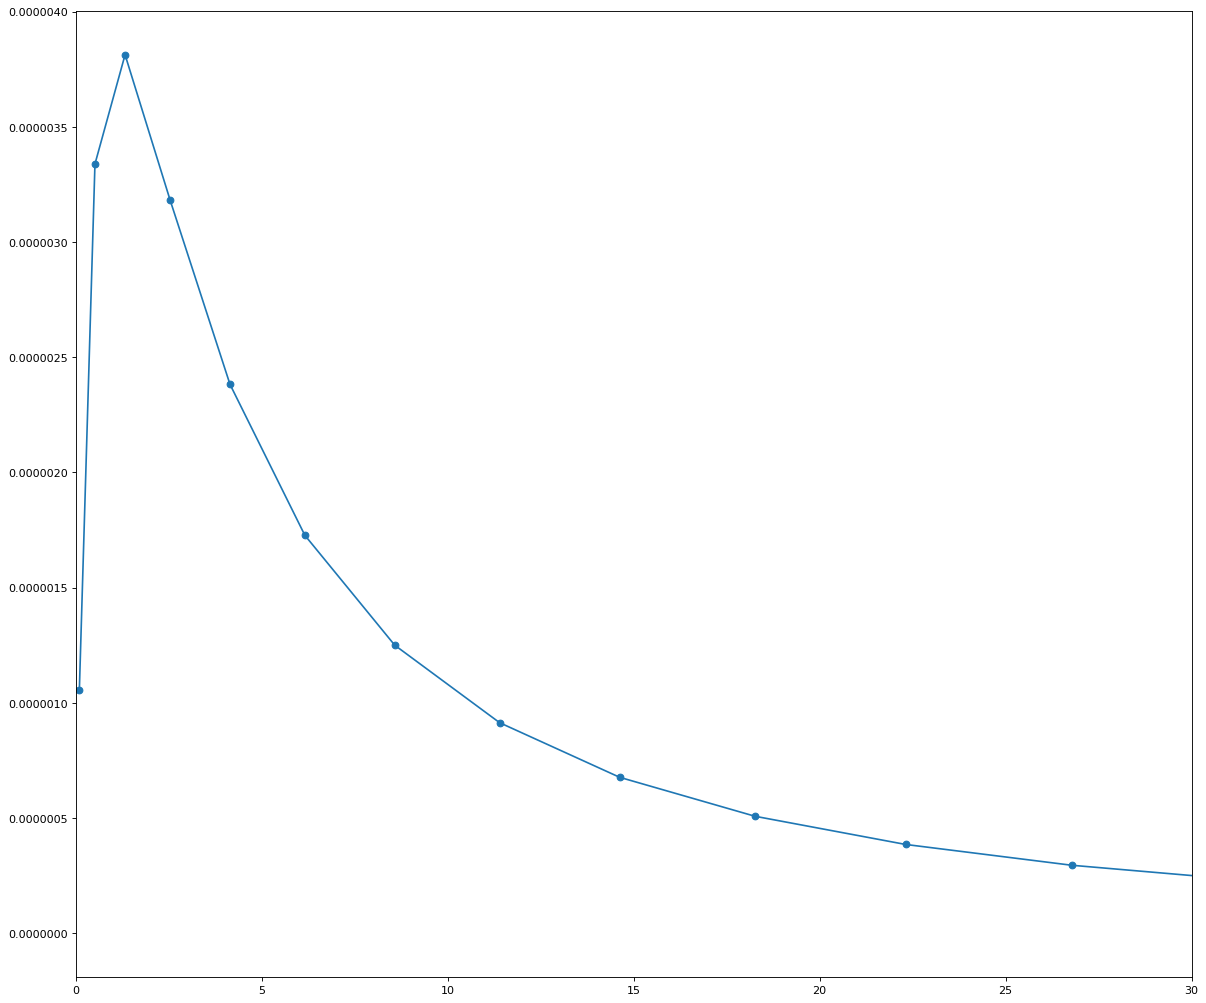

In [1]:

import L2Norm as l2n
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')

fName = 'Response_M1_1S0_Nmax100_hw8.txt'
w_data = np.loadtxt(fName, skiprows=1,usecols=(2), unpack=True)


# Create the Response function object
R_M1_hw8 = l2n.ResponseFunction(fName)
E,R_L2_hw8 = R_M1_hw8.scattering_Response()

# Plot the Results
plt.plot(E, E*R_L2_hw8,'-o')
plt.xlim(0.0,30)

-2.22457991044 -2.22457985399 -2.22457985365 -2.22457984517 

Number of objects:  4


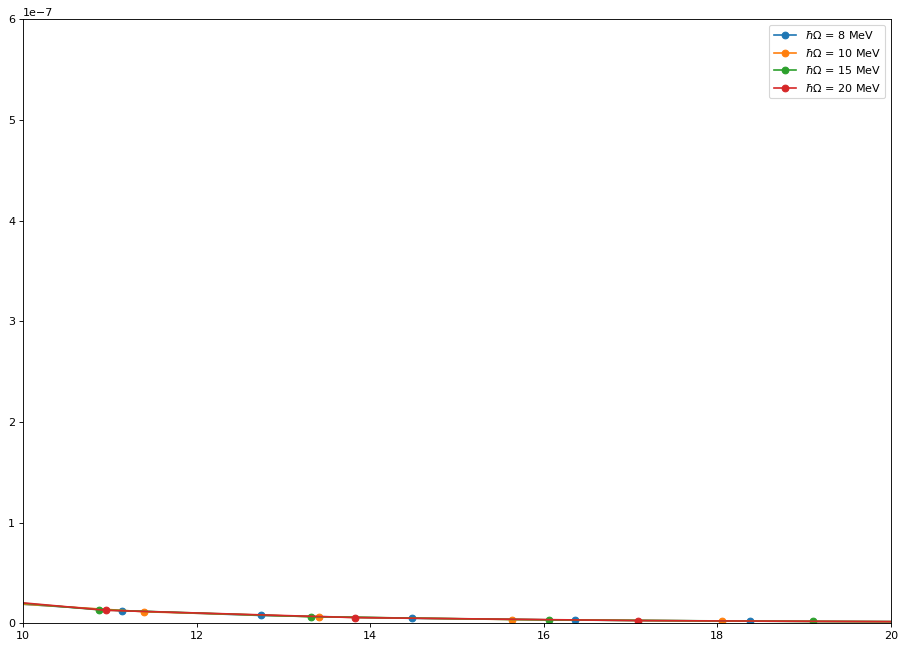

In [32]:
# Now we combine several Response functions together


fName1 = 'Response_M1_1S0_Nmax300_hw8.txt'
fName2 = 'Response_M1_1S0_Nmax300_hw10.txt'
fName3 = 'Response_M1_1S0_Nmax300_hw15.txt'
fName4 = 'Response_M1_1S0_Nmax300_hw20.txt'

R_M1_N300_hw8= l2n.ResponseFunction(fName1)
R_M1_N300_hw10 = l2n.ResponseFunction(fName2)
R_M1_N300_hw15 = l2n.ResponseFunction(fName3)
R_M1_N300_hw20 = l2n.ResponseFunction(fName4)

print(R_M1_N300_hw8.E0,R_M1_N300_hw10.E0,R_M1_N300_hw15.E0,R_M1_N300_hw20.E0,'\n')
E0_hw8 = R_M1_N300_hw8.E0
E0_hw10 = R_M1_N300_hw10.E0
E0_hw15 = R_M1_N300_hw15.E0
E0_hw20 = R_M1_N300_hw20.E0


R_vec =[R_M1_N300_hw8,R_M1_N300_hw10,R_M1_N300_hw15,R_M1_N300_hw20]

E_1,R_L2_N300_hw8 = R_M1_N300_hw8.scattering_Response()
E_2,R_L2_N300_hw10 = R_M1_N300_hw10.scattering_Response()
E_3,R_L2_N300_hw15 = R_M1_N300_hw15.scattering_Response()
E_4,R_L2_N300_hw20 = R_M1_N300_hw20.scattering_Response()

x_new,y_new = l2n.ResponseFunction.combine_Response_functions(R_vec)

plt.figure(figsize=(14, 10), dpi= 80, facecolor='w', edgecolor='k')
#plt.plot(x_new+1.0,x_new*y_new,'-o')
plt.plot(E_1-E0_hw8,R_L2_N300_hw8/(E_1-E0_hw8),'-o',label='$\hbar \Omega$ = 8 MeV')
plt.plot(E_2-E0_hw10,R_L2_N300_hw10/(E_2-E0_hw10),'-o',label='$\hbar \Omega$ = 10 MeV')
plt.plot(E_3-E0_hw15,R_L2_N300_hw15/(E_3-E0_hw15),'-o',label='$\hbar \Omega$ = 15 MeV')
plt.plot(E_4-E0_hw20,R_L2_N300_hw20/(E_4-E0_hw20),'-o',label='$\hbar \Omega$ = 20 MeV')
plt.xlim(10.0,20)
plt.ylim(0.0,6e-7)
plt.legend()
plt.savefig('Response.pdf',bboxes='tight')